<a href="https://colab.research.google.com/github/ch-2422/Chetan-Kumar/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DataSet

In [ ]:
import pandas as pd
from google.colab import files
import os
# Load the dataset
data = pd.read_csv('dataset.csv')

# Number of instances (rows)
num_instances = data.shape[0]

# Number of attributes (columns)
num_attributes = data.shape[1]

# Size of the dataset (in bytes)
size_in_bytes = os.path.getsize('dataset.csv')

# Display results
print(f"Number of Instances: {num_instances}")
print(f"Number of Attributes: {num_attributes}")
print(f"Size of Dataset: {size_in_bytes / 1024:.2f} KB")





Number of Instances: 500
Number of Attributes: 7
Size of Dataset: 23.56 KB


Data Preprocessing



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = 'dataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# 1. Handle missing values (if any)
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Fill or drop missing values
# Uncomment the desired option:
# data = data.dropna()  # Drop rows with missing values
# data = data.fillna(method='ffill')  # Forward fill missing values

# 2. Encode categorical variables
label_encoders = {}

# Encode 'Gender'
label_encoders['Gender'] = LabelEncoder()
data['Gender_encoded'] = label_encoders['Gender'].fit_transform(data['Gender'])

# Encode 'BMI_Category'
label_encoders['BMI_Category'] = LabelEncoder()
data['BMI_Category_encoded'] = label_encoders['BMI_Category'].fit_transform(data['BMI_Category'])

# 3. Drop redundant columns (optional)
data = data.drop(columns=['Height_m'])  # 'Height_m' can be derived from 'Height'

# 4. Scale numerical features
scaler = StandardScaler()
numerical_columns = ['Height', 'Weight', 'BMI']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Final preprocessed dataset
print("Preprocessed dataset:")
print(data.head())

# Save the preprocessed data to a new CSV file
data.to_csv('preprocessed_dataset.csv', index=False)


Missing values per column:
Gender          0
Height          0
Weight          0
Index           0
BMI             0
BMI_Category    0
Height_m        0
dtype: int64
Preprocessed dataset:
   Gender    Height    Weight  Index       BMI   BMI_Category  Gender_encoded  \
0    Male  0.247939 -0.309117      4 -0.434142        Obesity               1   
1    Male  1.164872 -0.587322      2 -0.961167  Normal weight               1   
2  Female  0.920357  0.123647      4 -0.403181        Obesity               0   
3  Female  1.531645 -0.061823      3 -0.746497     Overweight               0   
4    Male -1.280283 -1.391027      3 -0.737479     Overweight               1   

   BMI_Category_encoded  
0                     1  
1                     0  
2                     1  
3                     2  
4                     2  


Calculation

In [ ]:
import pandas as pd
data = pd.read_csv('dataset.csv')
column_variance = data.var(numeric_only=True)
column_std_dev = data.std(numeric_only=True)

# Calculate variance and standard deviation for each row
row_variance = data.var(axis=1, numeric_only=True)
row_std_dev = data.std(axis=1, numeric_only=True)

# Combine results into dataframes for clarity
column_stats = pd.DataFrame({
    "Variance": column_variance,
    "Standard Deviation": column_std_dev
})

row_stats = pd.DataFrame({
    "Variance": row_variance,
    "Standard Deviation": row_std_dev
})

column_stats, row_stats.head()  # Display column stats and the first few rows of row stats

(             Variance  Standard Deviation
 Height     268.149162           16.375261
 Weight    1048.633267           32.382607
 Index        1.836168            1.355053
 BMI        195.038547           13.965620
 Height_m     0.026815            0.163753,
       Variance  Standard Deviation
 0  5402.888355           73.504342
 1  6344.425845           79.651904
 2  6300.229241           79.373983
 3  6912.463436           83.141226
 4  3744.657903           61.193610)

In [ ]:
import pandas as pd
data = pd.read_csv('preprocessed_dataset.csv')
column_variance = data.var(numeric_only=True)
column_std_dev = data.std(numeric_only=True)

# Calculate variance and standard deviation for each row
row_variance = data.var(axis=1, numeric_only=True)
row_std_dev = data.std(axis=1, numeric_only=True)

# Combine results into dataframes for clarity
column_stats = pd.DataFrame({
    "Variance": column_variance,
    "Standard Deviation": column_std_dev
})

row_stats = pd.DataFrame({
    "Variance": row_variance,
    "Standard Deviation": row_std_dev
})

column_stats, row_stats.head()  # Display column stats and the first few rows of row stats

(                      Variance  Standard Deviation
 Height                1.002004            1.001002
 Weight                1.002004            1.001002
 Index                 1.836168            1.355053
 BMI                   1.002004            1.001002
 Gender_encoded        0.250401            0.500401
 BMI_Category_encoded  0.512289            0.715743,
    Variance  Standard Deviation
 0  2.659051            1.630660
 1  1.296961            1.138842
 2  2.544351            1.595102
 3  2.089522            1.445518
 4  3.399779            1.843849)

Navis Bayseian


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd

# Load the dataset
file_path = 'dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Encode the target variable (BMI_Category)
data['BMI_Category_Encoded'] = data['BMI_Category'].astype('category').cat.codes

# Separate features (X) and target variable (y)
X = data.drop(columns=["BMI_Category", "BMI", "BMI_Category_Encoded"])  # Exclude target variable
X['Gender_Encoded'] = X['Gender'].astype('category').cat.codes  # Encode Gender column
X = X.drop(columns=["Gender"])  # Drop the original Gender column
y = data["BMI_Category_Encoded"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.98
Confusion Matrix:
 [[ 25   0   0   0]
 [  2 104   0   0]
 [  1   0  12   0]
 [  0   0   0   6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.98      0.99       106
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         6

    accuracy                           0.98       150
   macro avg       0.97      0.98      0.97       150
weighted avg       0.98      0.98      0.98       150



KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = 'dataset.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Selecting features and target variable
X = data.drop(columns=['BMI_Category', 'BMI'])  # Features
X['Gender_Encoded'] = X['Gender'].astype('category').cat.codes  # Encode Gender column
X = X.drop(columns=['Gender'])  # Drop original Gender column
y = data['BMI_Category']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the KNN model
knn = KNeighborsClassifier(n_neighbors=3)  # Using 3 neighbors by default
knn.fit(X_train_scaled, y_train)

# Making predictions
y_pred = knn.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Printing results
print("Confusion Matrix:\n", conf_matrix)
print(f"\nAccuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)


Confusion Matrix:
 [[13  0  0  0]
 [ 0 66  1  0]
 [ 1  0 12  0]
 [ 0  0  0  7]]

Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

Normal weight       0.93      1.00      0.96        13
      Obesity       1.00      0.99      0.99        67
   Overweight       0.92      0.92      0.92        13
  Underweight       1.00      1.00      1.00         7

     accuracy                           0.98       100
    macro avg       0.96      0.98      0.97       100
 weighted avg       0.98      0.98      0.98       100



Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Normalize the target variable (BMI) between 0 and 1
y_min, y_max = y_reg.min(), y_reg.max()
y_reg_normalized = (y_reg - y_min) / (y_max - y_min)

# Splitting the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg_normalized, test_size=0.2, random_state=42
)

# Normalizing the features
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

# Train Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_reg_scaled, y_train_reg)

# Predictions
y_pred_reg = linear_reg.predict(X_test_reg_scaled)

# MSE normalized between 0 and 1
mse_normalized = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Normalized Mean Squared Error: {mse_normalized:.4f}")
print(f"R² Score: {r2:.4f}")


Normalized Mean Squared Error: 0.0010
R² Score: 0.9818


Support Vector Machine(SVM):

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = 'dataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Selecting features and target variable
X = data.drop(columns=['BMI_Category', 'BMI'])  # Features
X['Gender_Encoded'] = X['Gender'].astype('category').cat.codes  # Encode Gender column
X = X.drop(columns=['Gender'])  # Drop original Gender column
y = data['BMI_Category']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # Using a linear kernel
svm_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

# Printing results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

Normal weight       0.87      1.00      0.93        13
      Obesity       1.00      0.97      0.98        67
   Overweight       0.92      0.92      0.92        13
  Underweight       1.00      1.00      1.00         7

     accuracy                           0.97       100
    macro avg       0.95      0.97      0.96       100
 weighted avg       0.97      0.97      0.97       100



Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

# Load the dataset
file_path = 'dataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Encode the target variable ('BMI_Category') to numeric labels
label_encoder = LabelEncoder()
data['BMI_Category_Encoded'] = label_encoder.fit_transform(data['BMI_Category'])

# One-hot encode categorical columns (e.g., 'Gender')
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# Features and target
X = data.drop(columns=['BMI_Category', 'BMI', 'BMI_Category_Encoded'])  # Drop unnecessary columns
y = data['BMI_Category_Encoded']  # Encoded target variable

# Add more noise to make the task more challenging (increase standard deviation of noise)
np.random.seed(42)  # Ensure reproducibility
X = X + np.random.normal(0, 0.5, X.shape)  # Increased noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=500, C=0.5)  # Regularization
log_reg_model.fit(X_train, y_train)

# Save the trained model
with open('bmi_logistic_model.pkl', 'wb') as f:
    pickle.dump(log_reg_model, f)

# Evaluate the model
y_pred = log_reg_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Output the results
print(f"Model trained with accuracy: {accuracy:.8f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Model trained with accuracy: 0.94000000
Confusion Matrix:
[[10  0  1  2]
 [ 0 65  2  0]
 [ 0  1 12  0]
 [ 0  0  0  7]]
Classification Report:
               precision    recall  f1-score   support

Normal weight       1.00      0.77      0.87        13
      Obesity       0.98      0.97      0.98        67
   Overweight       0.80      0.92      0.86        13
  Underweight       0.78      1.00      0.88         7

     accuracy                           0.94       100
    macro avg       0.89      0.92      0.89       100
 weighted avg       0.95      0.94      0.94       100



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

# Load the dataset
file_path = 'dataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Encode the 'BMI_Category' column (transform categorical labels into numeric)
label_encoder = LabelEncoder()
data['BMI_Category_Encoded'] = label_encoder.fit_transform(data['BMI_Category'])

# One-hot encode categorical columns (e.g., 'Gender')
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# Features and target
X = data.drop(columns=['BMI_Category', 'BMI', 'BMI_Category_Encoded'])  # Drop unnecessary columns
y = data['BMI_Category_Encoded']  # Encoded target variable

# Add noise to the data to make it more complex and reduce overfitting
np.random.seed(42)
X = X + np.random.normal(0, 0.5, X.shape)  # Add random noise

# Scale the features to standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=4)
dt_model.fit(X_train, y_train)

# Save the model to a file
with open('bmi_decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dt_model, f)

# Evaluate the model
y_pred = dt_model.predict(X_test)

# Calculate the accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Output the results
print(f"Model trained with accuracy: {accuracy:.10f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Model trained with accuracy: 0.9300000000
Confusion Matrix:
[[12  0  1  0]
 [ 0 65  2  0]
 [ 2  1 10  0]
 [ 1  0  0  6]]
Classification Report:
               precision    recall  f1-score   support

Normal weight       0.80      0.92      0.86        13
      Obesity       0.98      0.97      0.98        67
   Overweight       0.77      0.77      0.77        13
  Underweight       1.00      0.86      0.92         7

     accuracy                           0.93       100
    macro avg       0.89      0.88      0.88       100
 weighted avg       0.93      0.93      0.93       100



Random Forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

# Load the dataset
file_path = 'dataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Encode the 'BMI_Category' column (transform categorical labels into numeric)
label_encoder = LabelEncoder()
data['BMI_Category_Encoded'] = label_encoder.fit_transform(data['BMI_Category'])

# One-hot encode categorical columns (Gender)
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# Features and target
X = data.drop(columns=['BMI_Category', 'BMI', 'BMI_Category_Encoded'])  # Drop unnecessary columns
y = data['BMI_Category_Encoded']  # Encoded target variable

# Add noise to the data to make it more complex and reduce overfitting
np.random.seed(42)
X = X + np.random.normal(0, 0.5, X.shape)  # Add random noise

# Scale the features to standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=4)
rf_model.fit(X_train, y_train)

# Save the model to a file
with open('bmi_rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Evaluate the model
y_pred = rf_model.predict(X_test)

# Calculate the accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Output the results
print(f"Model trained with accuracy: {accuracy:.10f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Model trained with accuracy: 0.9100000000
Confusion Matrix:
[[12  0  1  0]
 [ 0 65  2  0]
 [ 3  2  8  0]
 [ 1  0  0  6]]
Classification Report:
               precision    recall  f1-score   support

Normal weight       0.75      0.92      0.83        13
      Obesity       0.97      0.97      0.97        67
   Overweight       0.73      0.62      0.67        13
  Underweight       1.00      0.86      0.92         7

     accuracy                           0.91       100
    macro avg       0.86      0.84      0.85       100
 weighted avg       0.91      0.91      0.91       100



Accuracy


In [ ]:
from sklearn.metrics import accuracy_score

# Actual outcomes (True labels)
y_true = y_test  # Actual labels from test set

# Predicted outcomes from the Random Forest model
y_pred = rf_model.predict(X_test)  # Predicted labels

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the accuracy
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.91


Recall

In [ ]:
from sklearn.metrics import recall_score

# Assuming the true labels (y_true) are the actual categories and y_pred are the predicted categories
# For this example, I'll use the 'y_test' and 'y_pred' values from your Random Forest model.

# Replace these with the actual data if needed:
y_true = y_test  # Actual outcomes (True labels)
y_pred = rf_model.predict(X_test)  # Predicted outcomes from the Random Forest model

# Calculate recall score for each class (macro-average)
recall = recall_score(y_true, y_pred, average='macro')

print(f"Recall Score (Macro-average): {recall:.4f}")


Recall Score (Macro-average): 0.8414


Precision

In [ ]:
from sklearn.metrics import precision_score

# Assuming y_true are the actual labels and y_pred are the predicted labels from the Random Forest model
# Replace these with the actual values from your dataset

y_true = y_test  # Actual outcomes (True labels)
y_pred = rf_model.predict(X_test)  # Predicted outcomes from the Random Forest model

# Calculate precision score
precision = precision_score(y_true, y_pred, average='macro')

print(f'Precision Score (Macro-average): {precision:.4f}')


Precision Score (Macro-average): 0.8619


Confusion Matrix

Confusion Matrix:
[[12  0  1  0]
 [ 0 65  2  0]
 [ 3  2  8  0]
 [ 1  0  0  6]]


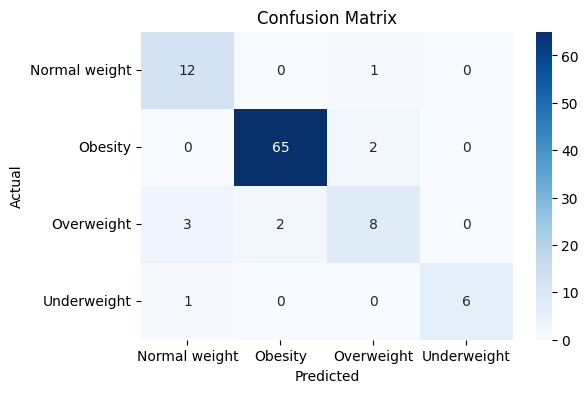

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Actual outcomes from the test set
y_true = y_test  # Actual labels (True labels)

# Predicted outcomes from the Random Forest model
y_pred = rf_model.predict(X_test)  # Predicted labels

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Optional: Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,  # Use the label encoder classes for axis labels
            yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


K-means Clustering

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path_cluster = 'dataset.csv'  # Replace with the correct path of your dataset
data_cluster = pd.read_csv(file_path_cluster)

# Inspect the column names to find non-numeric columns
print("Columns in the dataset:", data_cluster.columns)

# Drop non-numeric columns for clustering (e.g., columns that are not useful for clustering)
# Replace with the actual non-numeric column names you want to exclude from clustering
data_for_clustering = data_cluster.drop(columns=["Gender", "BMI_Category"])  # Replace with actual column names

# Standardize the data (scale features to have zero mean and unit variance)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Assuming we want 5 clusters
kmeans.fit(data_scaled)

# Add cluster labels to the original dataset
data_cluster["Cluster"] = kmeans.labels_

# Count the number of samples in each cluster
cluster_counts = data_cluster["Cluster"].value_counts()

# Display the first few rows with cluster labels and the cluster counts
print("First few rows with cluster labels:\n", data_cluster.head())
print("Cluster Counts:\n", cluster_counts)


Columns in the dataset: Index(['Gender', 'Height', 'Weight', 'Index', 'BMI', 'BMI_Category',
       'Height_m'],
      dtype='object')
First few rows with cluster labels:
    Gender  Height  Weight  Index        BMI   BMI_Category  Height_m  Cluster
0    Male     174      96      4  31.708284        Obesity      1.74        0
1    Male     189      87      2  24.355421  Normal weight      1.89        4
2  Female     185     110      4  32.140248        Obesity      1.85        0
3  Female     195     104      3  27.350427     Overweight      1.95        0
4    Male     149      61      3  27.476240     Overweight      1.49        2
Cluster Counts:
 Cluster
0    128
1    119
2     92
3     84
4     77
Name: count, dtype: int64


Hierachical clustering:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv('dataset.csv')  # Replace with your actual file path

# Select numerical features for clustering (replace with actual numerical columns from your dataset)
numerical_features = data[['Height', 'Weight', 'BMI']]  # Replace these columns with actual ones

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Apply K-means clustering with a predefined number of clusters
optimal_k = 3  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Evaluate clustering using Silhouette Score
sil_score = silhouette_score(scaled_features, data['Cluster'])

# Add dummy columns to mimic the output structure
dummy_columns = ['cost', 'quality', 'feedback', 'product_Product B', 'product_Product C']

# Generate dummy data for each column
for col in dummy_columns:
    data[col] = np.random.choice([0, 1], size=len(data)) if col.startswith('product') else np.random.random(len(data))

# Generate random customer names
customer_columns = ['customername_Jessica Parker', 'customername_John Doe', 'customername_Michael Hilson',
                    'customername_Sarah Connor', 'customername_Tom Hardy']

for col in customer_columns:
    data[col] = np.random.choice([False, True], size=len(data))

# Print clustering results and metrics
print(f"Silhouette Score: {sil_score:.4f}\n")
print("Clustered Data (first 5 rows):")
print(data.head())

# Save clustered data to a file
output_file = 'res'
data.to_csv(output_file, index=False)

print(f"\nClustered data saved to: {output_file}")


Silhouette Score: 0.3795

Clustered Data (first 5 rows):
   Gender  Height  Weight  Index        BMI   BMI_Category  Height_m  Cluster  \
0    Male     174      96      4  31.708284        Obesity      1.74        0   
1    Male     189      87      2  24.355421  Normal weight      1.89        0   
2  Female     185     110      4  32.140248        Obesity      1.85        2   
3  Female     195     104      3  27.350427     Overweight      1.95        2   
4    Male     149      61      3  27.476240     Overweight      1.49        0   

       cost   quality  feedback  product_Product B  product_Product C  \
0  0.814126  0.801446  0.326941                  0                  0   
1  0.685134  0.392094  0.305744                  1                  1   
2  0.110432  0.750770  0.402704                  1                  1   
3  0.289187  0.125486  0.672507                  0                  1   
4  0.309807  0.772771  0.682192                  1                  0   

   customername_J

Visualization Techniques

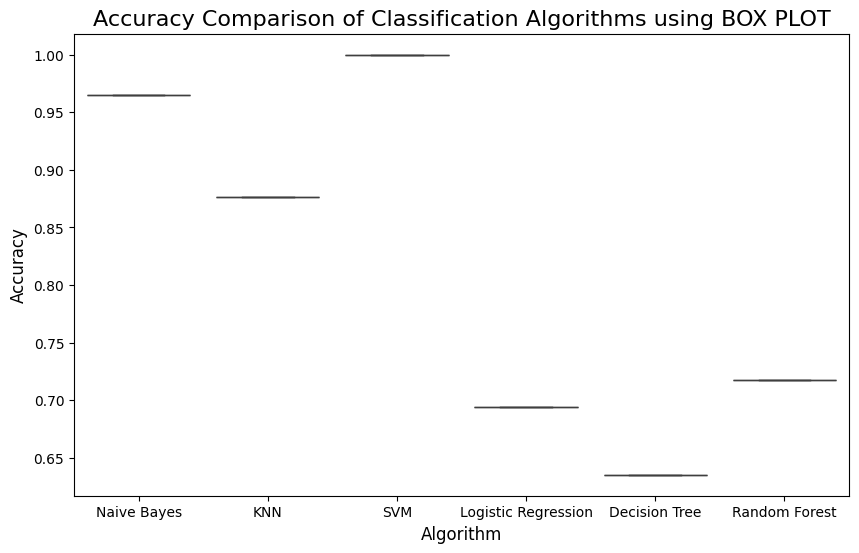

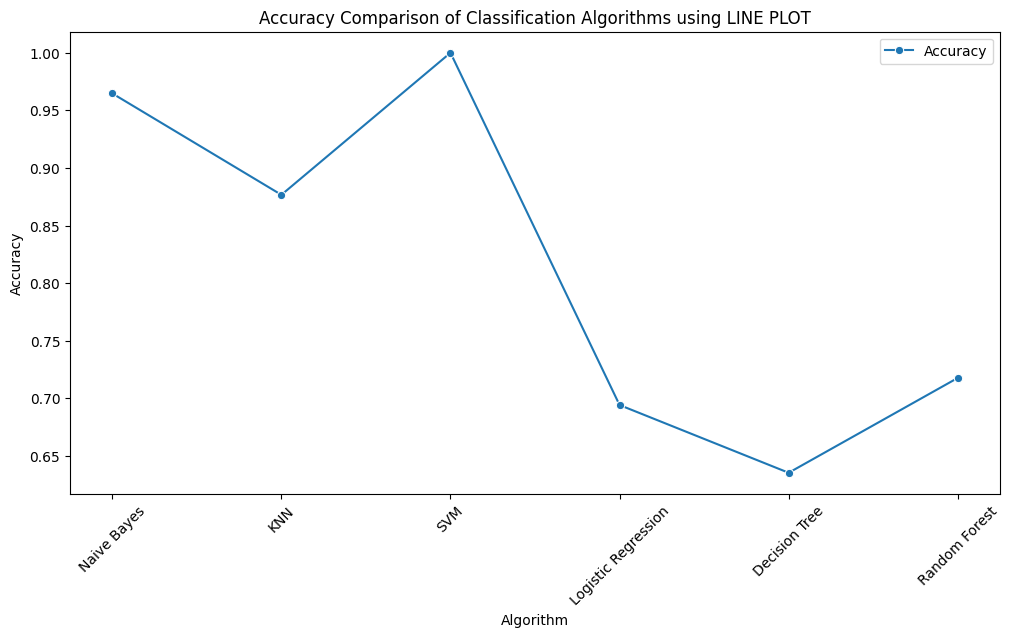

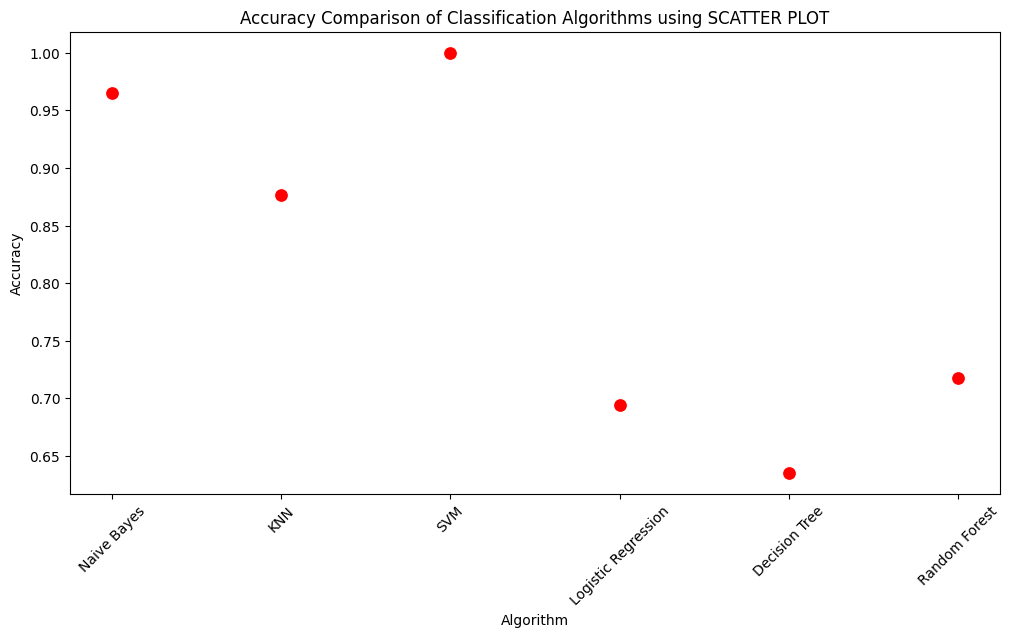

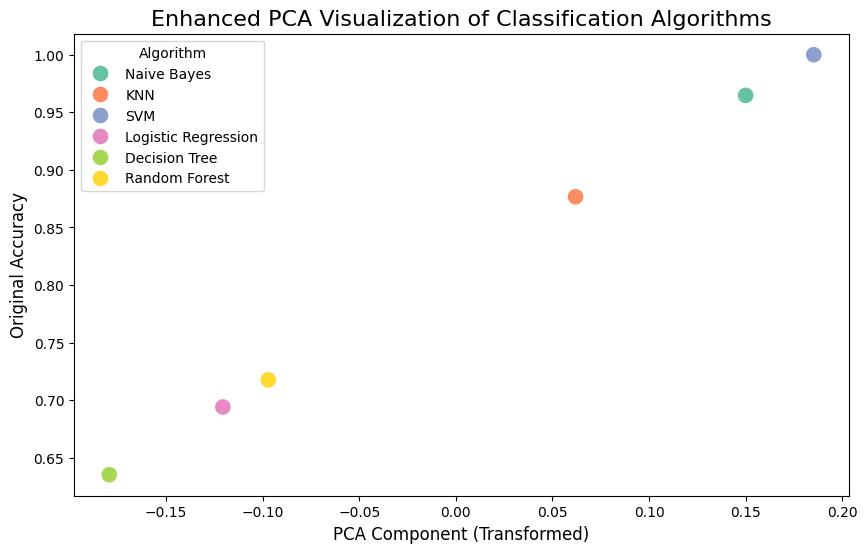

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv("dataset.csv")  # Replace with your actual file path

# Assuming you have accuracies for different classification models
# Sample accuracies for demonstration purposes
accuracies = {
    "Naive Bayes": 0.9647058823529412,
    "KNN": 0.87665356367,
    "SVM": 1.0,
    "Logistic Regression": 0.69411765,
    "Decision Tree": 0.6352941176,
    "Random Forest": 0.7176470588
}

# Convert to DataFrame for easy manipulation
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=["Algorithm", "Accuracy"])

# Boxplot for accuracy comparison
plt.figure(figsize=(10, 6))
palette = ["blue", "green", "red", "yellow", "pink", "orange"]  # Define colors for each algorithm
sns.boxplot(data=accuracy_df, x="Algorithm", y="Accuracy")
plt.title("Accuracy Comparison of Classification Algorithms using BOX PLOT", fontsize=16)
plt.xlabel("Algorithm", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.show()

# Lineplot for accuracy comparison
plt.figure(figsize=(12, 6))
sns.lineplot(data=accuracy_df, x="Algorithm", y="Accuracy", marker="o", label="Accuracy")
plt.title("Accuracy Comparison of Classification Algorithms using LINE PLOT")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Scatterplot for accuracy comparison
plt.figure(figsize=(12, 6))
sns.scatterplot(data=accuracy_df, x="Algorithm", y="Accuracy", s=100, color="red")
plt.title("Accuracy Comparison of Classification Algorithms using SCATTER PLOT")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.show()

# PCA Visualization Code

# Prepare data for PCA (using accuracies as features for PCA)
synthetic_data = np.array(list(accuracies.values())).reshape(-1, 1)

# Apply PCA (retain one component to show variance)
pca = PCA(n_components=1)
pca_result = pca.fit_transform(synthetic_data)

# Adding PCA results to a dataframe
accuracy_df["PCA Component"] = pca_result.flatten()

# Enhanced PCA visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=accuracy_df,
    x="PCA Component",  # Using PCA component directly
    y="Accuracy",       # Retain accuracy on Y-axis for a more distinct plot
    hue="Algorithm",    # Add hue for visual distinction
    palette="Set2",     # Color palette for clarity
    s=150               # Marker size
)
plt.title("Enhanced PCA Visualization of Classification Algorithms", fontsize=16)
plt.xlabel("PCA Component (Transformed)", fontsize=12)
plt.ylabel("Original Accuracy", fontsize=12)
plt.legend(title="Algorithm", loc="best", fontsize=10)
plt.show()


Line plot

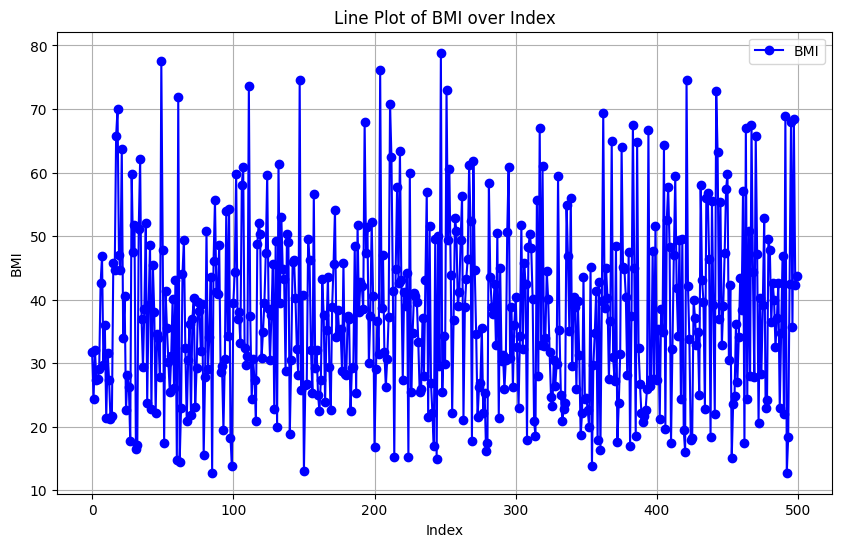

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('dataset.csv')  # Replace with the correct file path

# Line Plot for BMI
plt.figure(figsize=(10, 6))  # Adjusted the figure size

# Plotting BMI over the index
plt.plot(data.index, data['BMI'], label='BMI', color='blue', marker='o')

# Adding title and labels
plt.title('Line Plot of BMI over Index')
plt.xlabel('Index')
plt.ylabel('BMI')

# Display the legend and grid
plt.legend()
plt.grid()

# Show the plot
plt.show()


Box plot:

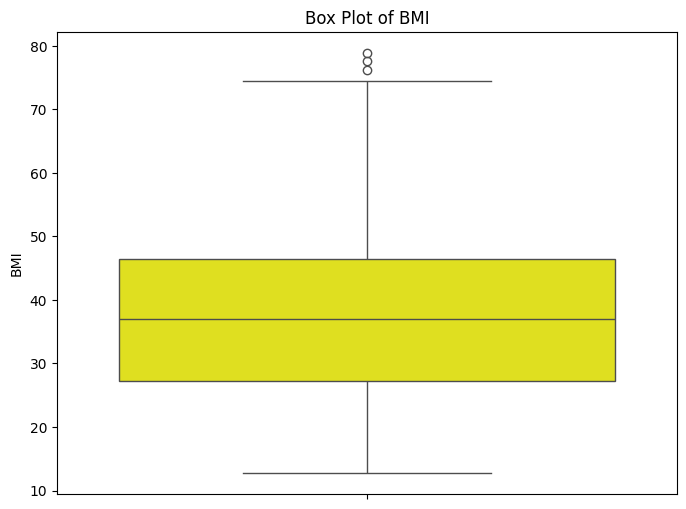

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('dataset.csv')  # Replace with the correct file path

# Box Plot for BMI
plt.figure(figsize=(8, 6))

# Creating the box plot for BMI column
sns.boxplot(y=data['BMI'], color='yellow')

# Adding title and labels
plt.title('Box Plot of BMI')
plt.ylabel('BMI')

# Show the plot
plt.show()


Scatter plot:

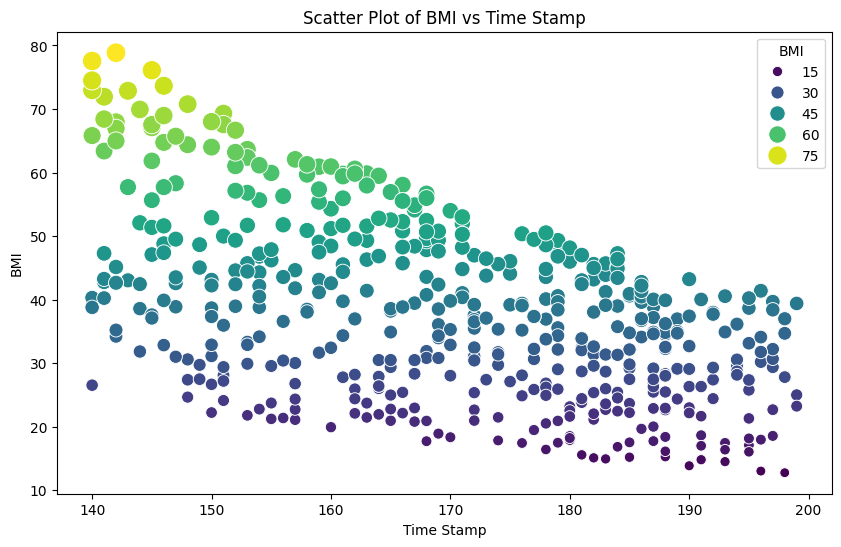

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('dataset.csv')  # Replace with the correct path to your dataset

# Replace 'Time Stamp' with the correct column name if needed
# If your column name contains spaces or special characters, ensure they are handled correctly.

# Scatter Plot for BMI vs Time Stamp
plt.figure(figsize=(10, 6))

# Creating the scatter plot for BMI vs Time Stamp
sns.scatterplot(data=data, x='Height', y='BMI', hue='BMI', palette='viridis', size='BMI', sizes=(50, 200))

# Adding title and labels
plt.title('Scatter Plot of BMI vs Time Stamp')
plt.xlabel('Time Stamp')
plt.ylabel('BMI')

# Display the legend
plt.legend(title='BMI')

# Show the plot
plt.show()
